-----------------Stokes of Source--------------------
S0 = 0.910
S1 = 0.000
S2 = -0.707
S3 = -0.707
Psi (polarization azimuth) = -45.000°
Chi (polarization ellipticity) = -25.495°
------------------Stokes after 45---------------------
S0 = 0.133
S1 = 0.000
S2 = 1.000
S3 = -0.000
Psi (polarization azimuth) = 45.000°
Chi (polarization ellipticity) = -0.000°
------------------Stokes after First Phase Modulator---------------------
S0 = 0.133
S1 = 0.000
S2 = 1.000
S3 = -0.000
Psi (polarization azimuth) = 45.000°
Chi (polarization ellipticity) = -0.000°


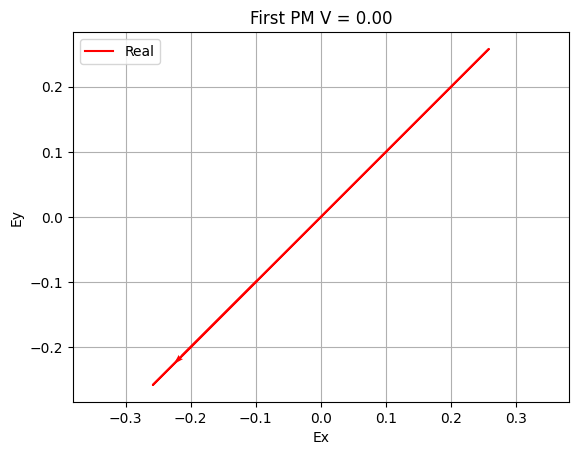

------------------Stokes after QC---------------------
S0 = 0.133
S1 = 0.000
S2 = 0.586
S3 = -0.810
Psi (polarization azimuth) = 45.000°
Chi (polarization ellipticity) = nan°


/tmp/ipython-input-7-3860172964.py:64: RuntimeWarning: invalid value encountered in arcsin
  chi = 0.5 * np.arcsin(S3 / S0)


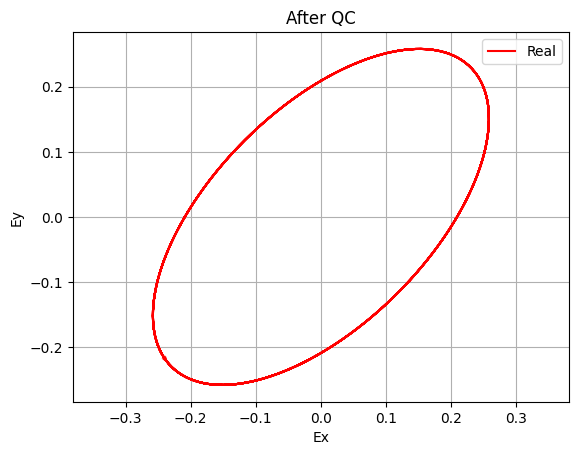

Similarity Cos Index = [[0.59349104]]
------------------Stokes after Second Phase Modulator---------------------
S0 = 0.133
S1 = 0.000
S2 = 0.586
S3 = -0.810
Psi (polarization azimuth) = 45.000°
Chi (polarization ellipticity) = nan°


/tmp/ipython-input-7-3860172964.py:74: RuntimeWarning: invalid value encountered in arcsin
  chi = 0.5 * np.arcsin(S3 / S0)


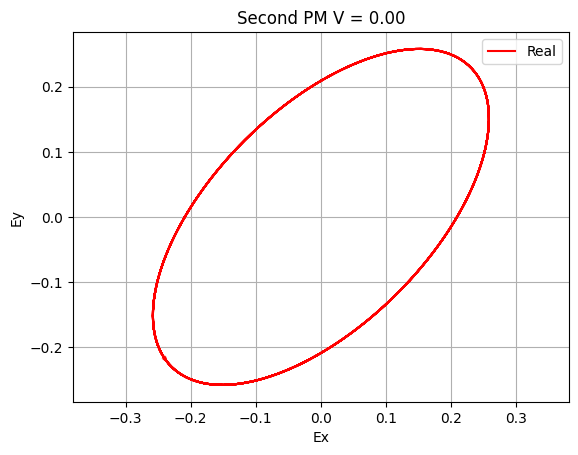

In [ ]:
from src.lasers import sslaser as laser
from src.viewers.stokes import compute_stokes_parameters, poincare
from src.viewers import polarimeter
from src.opto_eq import polarizer, PhaseModulator, cable
import numpy as np
def cos_sim(v1: np.ndarray, v2: np.ndarray) -> np.ndarray:
  """
  Returns the cosine similarity index between two vectors.
  Parameters:
      v1 (np.ndarrary): Vector 1, must be a np.column_stack type.
      v2 (np.ndarrary): Vector 2, must be a np.column_stack type.
  Raises:
      No Error
  """
  num = np.dot(v1, v2.T)
  mag_a = np.linalg.norm(v1)
  mag_b = np.linalg.norm(v2)
  sim = num/(mag_a*mag_b)
  return sim
source = laser.SolidStateLaser(
    wavelength=1550e-9,  # Laser wavelength
    polarization_azimuth=np.pi,  # 45° polarization
    polarization_ellipticity=np.pi/4,
    power_dbm=-5,  # arbitrary power unit
    frequency=5e6
)

pout = source.power_out
phase_modulator = PhaseModulator()
Vpi = phase_modulator.Vpi
E = source.get_electric_field(normalize=False, over_period=True)
S0, S1, S2, S3 = compute_stokes_parameters(E)
print(f"-----------------Stokes of Source--------------------")
psi = 0.5 * np.arctan2(S2, S1)
chi = 0.5 * np.arcsin(S3 / S0)
print(f"S0 = {S0:.3f}\nS1 = {S1:.3f}\nS2 = {S2:.3f}\nS3 = {S3:.3f}")
print(f"Psi (polarization azimuth) = {np.rad2deg(psi):.3f}°")
print(f"Chi (polarization ellipticity) = {np.rad2deg(chi):.3f}°")
print(f"------------------Stokes after 45---------------------")
E = polarizer(E, polarization="45")
S0, S1, S2, S3 = compute_stokes_parameters(E)
psi = 0.5 * np.arctan2(S2, S1)
chi = 0.5 * np.arcsin(S3 / S0)
print(f"S0 = {S0:.3f}\nS1 = {S1:.3f}\nS2 = {S2:.3f}\nS3 = {S3:.3f}")
print(f"Psi (polarization azimuth) = {np.rad2deg(psi):.3f}°")
print(f"Chi (polarization ellipticity) = {np.rad2deg(chi):.3f}°")
# polarimeter(E, title="Source at 45 LP")
# poincare(S1, S2, S3)
print(f"------------------Stokes after First Phase Modulator---------------------")
E = phase_modulator.modulate(E_field=E, V=0)
S0, S1, S2, S3 = compute_stokes_parameters(E)
stokes_fpm = np.column_stack([S0, S1, S2, S3])
psi = 0.5 * np.arctan2(S2, S1)
chi = 0.5 * np.arcsin(S3 / S0)
print(f"S0 = {S0:.3f}\nS1 = {S1:.3f}\nS2 = {S2:.3f}\nS3 = {S3:.3f}")
print(f"Psi (polarization azimuth) = {np.rad2deg(psi):.3f}°")
print(f"Chi (polarization ellipticity) = {np.rad2deg(chi):.3f}°")
polarimeter(E, title=f"First PM V = {0:.2f}")
print(f"------------------Stokes after QC---------------------")
E, _ = cable(100, E, pout, dispersion=True)
S0, S1, S2, S3 = compute_stokes_parameters(E)
stokes_QC = np.column_stack([S0, S1, S2, S3])
psi = 0.5 * np.arctan2(S2, S1)
chi = 0.5 * np.arcsin(S3 / S0)
print(f"S0 = {S0:.3f}\nS1 = {S1:.3f}\nS2 = {S2:.3f}\nS3 = {S3:.3f}")
print(f"Psi (polarization azimuth) = {np.rad2deg(psi):.3f}°")
print(f"Chi (polarization ellipticity) = {np.rad2deg(chi):.3f}°")
polarimeter(E, title="After QC")
print(f"Similarity Cos Index = {cos_sim(stokes_fpm, stokes_QC)}")
print(f"------------------Stokes after Second Phase Modulator---------------------")
E = phase_modulator.modulate(E_field=E, V=0)
S0, S1, S2, S3 = compute_stokes_parameters(E)
psi = 0.5 * np.arctan2(S2, S1)
chi = 0.5 * np.arcsin(S3 / S0)
print(f"S0 = {S0:.3f}\nS1 = {S1:.3f}\nS2 = {S2:.3f}\nS3 = {S3:.3f}")
print(f"Psi (polarization azimuth) = {np.rad2deg(psi):.3f}°")
print(f"Chi (polarization ellipticity) = {np.rad2deg(chi):.3f}°")
polarimeter(E, title=f"Second PM V = {0:.2f}")

In [1]:
!git clone https://github.com/azaan-mahmood/opto-sim.git

Cloning into 'opto-sim'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 104 (delta 41), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (104/104), 51.73 KiB | 3.69 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [2]:
%cd opto-sim/

/content/opto-sim
